In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pypsa

plt.style.use(["bmh", "../../matplotlibrc"])
sns.set_palette("colorblind")

import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 100

COUNTRY = "DE"

In [29]:
files = {
    "VOLL 2000 €/MWh (ST, 35a, perfect foresight)": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-voll+true_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc",
    "VOLL 2000 €/MWh (ST, 35a, myopic 96h/48h, heuristic storage bidding)": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48.nc",
    "PWL-elastic (ST, 35a, perfect foresight)": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-elastic_pwl+default_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc",
    "PWL-elastic (ST, 35a, myopic 96h/48h, heuristic storage bidding)": f"../../results/20240506-35a-35a/network_myopic_LT-country+{COUNTRY}-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48.nc",
}
ns = {k: pypsa.Network(v) for k, v in files.items()}

INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48.nc has buses, carriers, generators, links, loads, stores


/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/home/fneum/miniconda3/envs/price-formation/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/tmp/ipykernel_1329712/1338128107.py:53: UserWarning: This figure includes Axes that are not

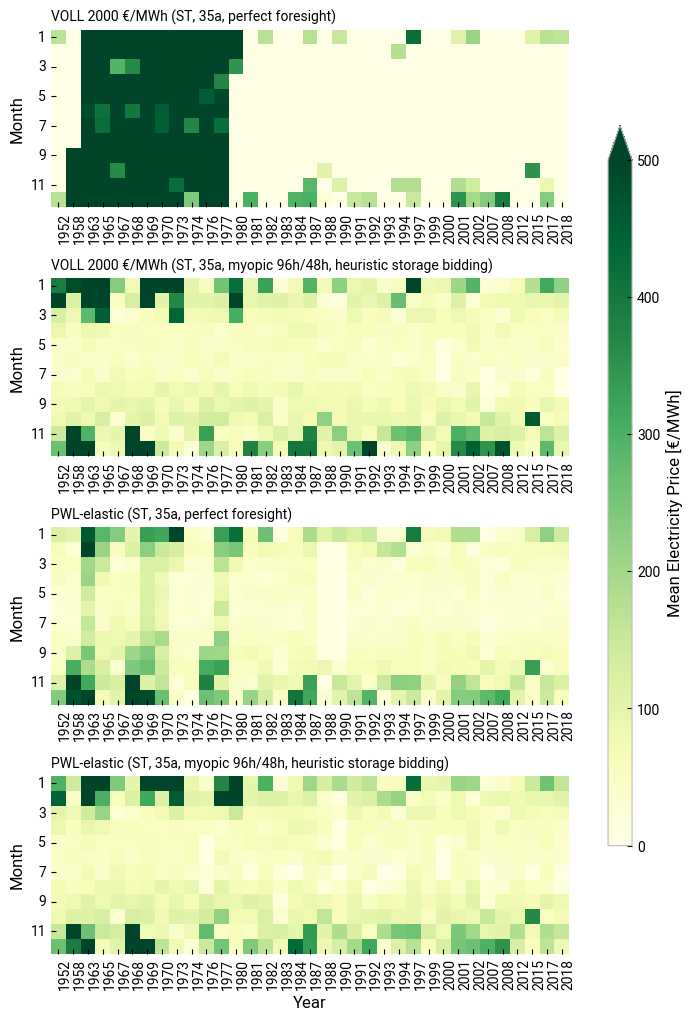

In [30]:
fig, axs = plt.subplots(
    4,
    1,
    figsize=(8, 12),
    sharey=True,
    sharex=False,
    gridspec_kw={"wspace": 0.4, "hspace": 0.4},
)

norm = plt.Normalize(0, 500)
cmap = "YlGn"

for i, ax in enumerate(axs.flatten()):

    key = list(ns.keys())[i]
    n = ns[key]
    lmp = n.buses_t.marginal_price["electricity"]
    lmp = lmp.groupby([lmp.index.year, lmp.index.month]).mean().unstack()

    sns.heatmap(lmp.T, ax=ax, square=True, cbar=False, cmap=cmap, norm=norm)

    ax.set_title(key, loc="left", fontsize="medium")
    ax.set_ylabel("Month")

    if i == 3:
        ax.set_xlabel("Year")
    else:
        ax.set_xlabel("")

    plt.setp(ax.get_yticklabels(), rotation=0)

    plt.setp(ax.get_xticklabels(), rotation=90, ha="left")


cbar_ax = fig.add_axes([0.87, 0.2, 0.03, 0.6])

fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cbar_ax,
    orientation="vertical",
    fraction=0.1,
    # shrink=0.5,
    label="Mean Electricity Price [€/MWh]",
    extend="max",
)

fig.subplots_adjust(right=0.87)

# plt.tight_layout()


for ext in ["png", "pdf"]:
    plt.savefig(f"../../figures/figure-heatmaps-myopia-{COUNTRY}.{ext}", bbox_inches="tight", dpi=300)